<a href="https://colab.research.google.com/github/Mukul1Panwar/Machine_Learning/blob/main/sentiment_ana(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [95]:
# load the data

In [3]:
!kaggle datasets download -d niraliivaghani/flipkart-product-customer-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset
License(s): DbCL-1.0
  0% 0.00/3.79M [00:00<?, ?B/s]
100% 3.79M/3.79M [00:00<00:00, 773MB/s]


In [4]:
!unzip /content/flipkart-product-customer-reviews-dataset.zip

Archive:  /content/flipkart-product-customer-reviews-dataset.zip
  inflating: Dataset-SA.csv          


In [96]:
# import the libraries

In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv("/content/Dataset-SA.csv")

In [7]:
df.shape

(205052, 6)

In [98]:
df.head()

,product_price,Rate,Review,Summary,Sentiment
0,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3999,3,fair,the quality is good but the power of air is de...,positive
3,3999,1,useless product,very bad product its a only a fan,negative
4,3999,3,fair,ok ok product,neutral


In [99]:
# drop the unwanted columns

In [8]:
df = df.drop(columns='product_name')

In [10]:
df = df[pd.to_numeric(df['Rate'], errors='coerce').notna()]

In [100]:
# EDA (Exploratory data analysis)

In [11]:
df['Rate'].value_counts()

,count
Rate,
5,118765
4,41894
1,21300
3,16599
2,6491


<Axes: xlabel='Rate'>

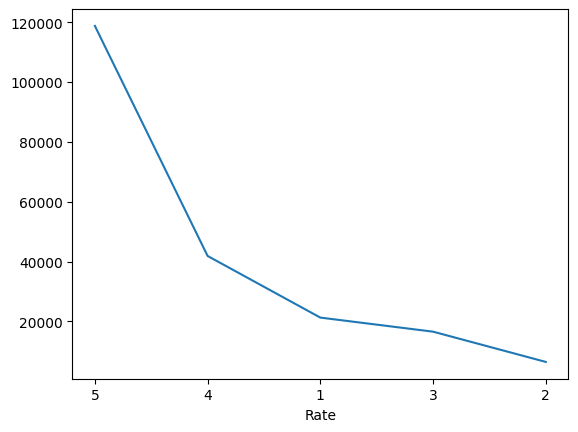

In [12]:
Y = df['Rate'].value_counts()
sns.lineplot(x=Y.index,y=Y.values)

<Axes: xlabel='Sentiment', ylabel='count'>

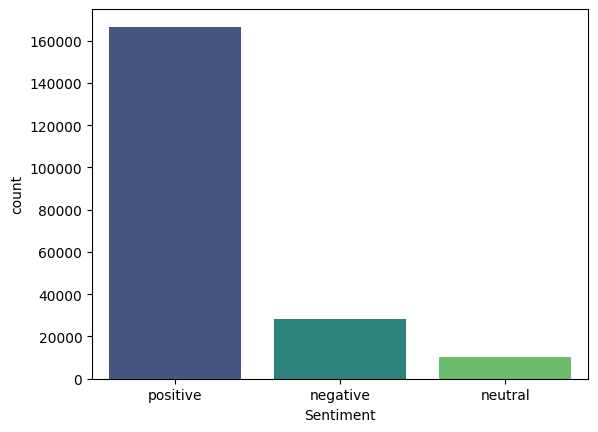

In [13]:
sns.countplot(data=df,x='Sentiment',palette='viridis')

In [14]:
new_df = df.copy()

In [15]:
new_df = new_df.drop(columns=["product_price","Rate","Review"])

In [16]:
le = LabelEncoder()
new_df['Sentiment'] = le.fit_transform(new_df['Sentiment'])

In [17]:
new_df.head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,2
1,best budget 2 fit cooler nice cooling,2
2,the quality is good but the power of air is de...,2
3,very bad product its a only a fan,0
4,ok ok product,1


In [18]:
# 2: positive
# 0: negative
# 1: neutral

In [19]:
new_df['Sentiment'].value_counts()

,count
Sentiment,
2,166579
0,28231
1,10239


In [101]:
# Feature Engineering

In [20]:
new_df.shape

(205049, 2)

In [21]:
new_df = new_df.dropna()

In [22]:
new_df.isna().sum()

,0
Summary,0
Sentiment,0


In [23]:
new_df.duplicated().sum()

np.int64(111120)

In [24]:
new_df.drop_duplicates(inplace=True)

In [25]:
new_df.duplicated().sum()

np.int64(0)

In [26]:
new_df.shape

(93918, 2)

In [27]:
new_df['Sentiment'].value_counts()

,count
Sentiment,
2,69340
0,18788
1,5790


In [102]:
# Apply the NLP (Natural Language Processing)

In [28]:
import re

In [29]:
def remove_tags(text):
  cleaned_text = re.sub(re.compile('<.*?>'),'',text)
  return cleaned_text

In [30]:
new_df['Summary'] = new_df['Summary'].apply(remove_tags)

In [31]:
def remove_urls(text):
  cleaned_text = re.sub(re.compile('https?://\S++|www\.\S+'),'',text)
  return cleaned_text

In [32]:
new_df['Summary'] = new_df['Summary'].apply(remove_urls)

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
punc = string.punctuation

def remove_punc(text):
  for char in punc:
    cleaned_text = text.replace(char,'')
    return cleaned_text

In [35]:
new_df['Summary'] = new_df['Summary'].apply(remove_punc)

In [36]:
# def remove_incorrect(text):
#   txtblb = TextBlob(text)
#   cleaned_text = txtblb.correct().string
#   return cleaned_text

In [103]:
# NOTE: We can use Tokenizer and pad sequences in Deep learning

In [37]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(
    new_df['Summary'],new_df['Sentiment'],test_size=0.25,random_state=42
)

In [104]:
# Apply the Tfidf (Term Frequency—Inverse Document Frequency)

In [52]:
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1,2))
Xtrain_tfidf = tfidf.fit_transform(Xtrain)
Xtest_tfidf = tfidf.transform(Xtest)

In [39]:
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,Ytrain)

LogisticRegression()

In [40]:
accuracy_score(Ytrain,lr.predict(Xtrain_tfidf))

0.9134274113404697

In [41]:
accuracy_score(Ytest,lr.predict(Xtest_tfidf))

0.8914821124361159

In [ ]:
# 2: positive
# 0: negative
# 1: neutral

In [105]:
# Make a pipeline for Testing

In [120]:
pipeline = Pipeline(steps=[
    ('tfidf',TfidfVectorizer(max_features=10000,ngram_range=(1,2))),
    ('lr',LogisticRegression())
])

pipeline.fit(Xtrain,Ytrain)

reverse_mapping = {0:'Negative',1:'Neutral',2:'Positive'}

sen = input("enter the review: ")
sen = remove_punc(sen)
sen = remove_urls(sen)
sen = remove_tags(sen)

prediction = pipeline.predict([sen])
print('Prediction : ',reverse_mapping[prediction[0]])

enter the review: not safe for childrens available homegetting heat in outer panel not able to open the door getting over heat
Prediction :  Negative
